In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import os
os.chdir("E:\\DataSets\\bank-additional")
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

# EDA

In [3]:
df.shape

(41188, 21)

In [4]:
# take a look at the type, number of columns, entries, null values etc..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df["y"] = df["y"].replace(["yes","no"],[1,0])

In [7]:
dfx = df.drop("y",axis=1)
target = df["y"]

In [8]:
df["y"].value_counts()/len(df)*100

0    88.734583
1    11.265417
Name: y, dtype: float64

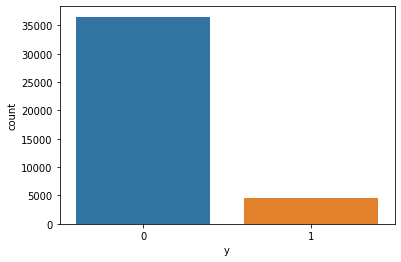

In [9]:
sns.countplot(df['y'])

Note: Higly Imbalanced data

## Knowing the categorical variables

In [10]:
i=1
for var in dfx.columns:
    if dfx[var].dtype == 'object':
        print(i,".",var,"----> ",dfx[var].unique())
        print("***************************************")
        print("\n")
        i+=1
print("Total we have", i , "object dtype variables")

1 . job ---->  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
***************************************


2 . marital ---->  ['married' 'single' 'divorced' 'unknown']
***************************************


3 . education ---->  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
***************************************


4 . default ---->  ['no' 'unknown' 'yes']
***************************************


5 . housing ---->  ['no' 'yes' 'unknown']
***************************************


6 . loan ---->  ['no' 'yes' 'unknown']
***************************************


7 . contact ---->  ['telephone' 'cellular']
***************************************


8 . month ---->  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
***************************************


9 . day_of_week ---->  ['mon' 'tue' 'wed' 'thu' 'fri']
*

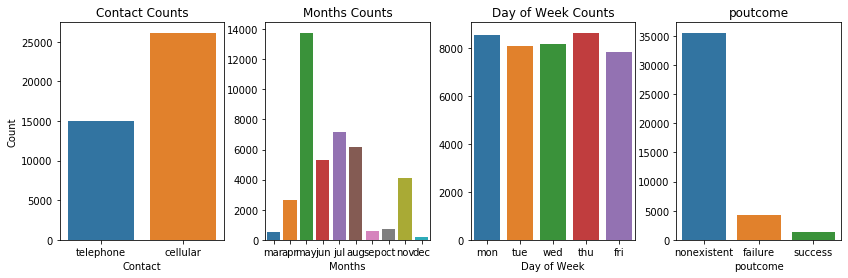

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (14,4))
sns.countplot(dfx['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(dfx['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(dfx['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

sns.countplot(dfx['poutcome'], ax = ax4)
ax4.set_xlabel('poutcome', fontsize = 10)
ax4.set_ylabel('')
ax4.set_title('poutcome')
ax4.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

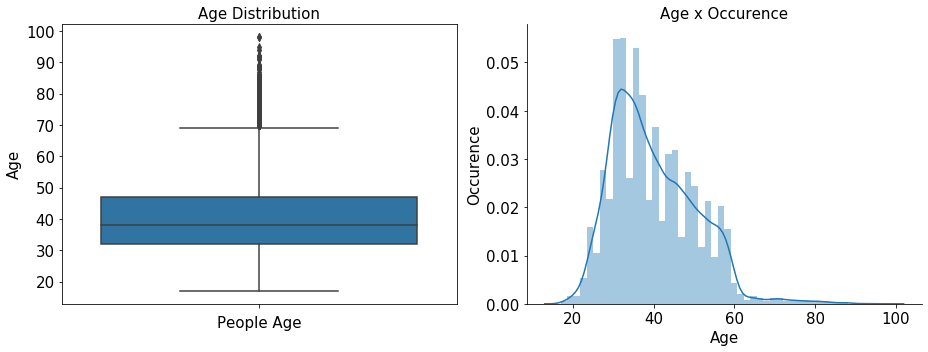

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = dfx, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(dfx['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Occurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

Conclusion about AGE,due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not.

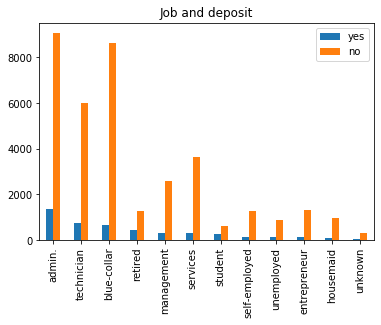

In [13]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 1]['job'].value_counts()
j_df['no'] = df[df['y'] == 0]['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

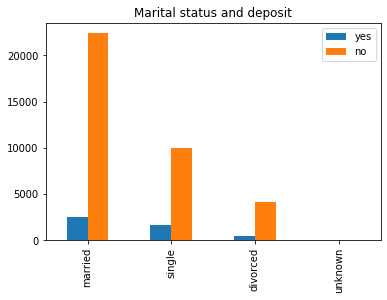

In [14]:
#marital status and deposit
m_df = pd.DataFrame()

m_df['yes'] = df[df['y'] == 1]['marital'].value_counts()
m_df['no'] = df[df['y'] == 0]['marital'].value_counts()

m_df.plot.bar(title = 'Marital status and deposit')

From the above graph,
        we can conclude that each class in cateogrical features are biased towards one target class

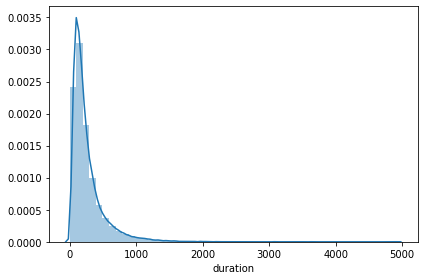

In [15]:
sns.distplot(dfx['duration'])
#sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

**Note:** Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, also they already mentioned that duration vaariable is higly correlated with 
target variable.


# Preprocessing

In [16]:
cat_col= []
num_col= []
for var in dfx.columns:
    if dfx[var].dtype == 'object':
        cat_col.append(var)
    else:
        num_col.append(var)

In [17]:
print("categorical column---->",cat_col)
print("*"*120)
print("numerical column----->",num_col)

categorical column----> ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
************************************************************************************************************************
numerical column-----> ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [18]:
dfx=dfx.replace("unknown",np.nan)

In [20]:
dfx.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [22]:
for col in dfx.columns:
    if dfx[col].isnull().sum() > 1 :
        dfx[col] = dfx[col].fillna(dfx[col].mode()[0])

In [23]:
dfx["education"]=dfx["education"].replace(["basic.4y","basic.6y","basic.9y"],"basic")

In [27]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_l = pd.DataFrame()
for var in dfx[cat_col]:
        df_l[var]= labelencoder_X.fit_transform(dfx[var]) 

In [28]:
#dummy encoding
df_dum = pd.get_dummies(dfx[cat_col],drop_first=True)
df_dum.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [29]:
num_df = dfx[num_col]
num_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [49]:
final_df = pd.concat([num_df,df_l,df_dum],axis=1)

In [50]:
final_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


# Model

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size = 0.30, random_state = 101)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold,KFold
from lightgbm import LGBMClassifier

# Trying with diff algorithm

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=5, n_jobs=1, scoring = 'accuracy').mean())

[[10593   385]
 [  752   627]]
91.0


In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=5, n_jobs=1, scoring = 'accuracy').mean())

[[10255   723]
 [  642   737]]
89.0


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=5, n_jobs=1, scoring = 'accuracy').mean())

[[10636   342]
 [  759   620]]
91.0


In [57]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=5, n_jobs=1, scoring = 'accuracy').mean())

[[10044   934]
 [  701   678]]
87.0


In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 5).mean())

[[10531   447]
 [  631   748]]
91.0


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=5, n_jobs=1, scoring = 'accuracy').mean())

[[10599   379]
 [  662   717]]
92.0


In [60]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier',
                           'K-Near Neighbors','Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, KNNCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
5,Gradient Boosting,0.916409
2,K-Near Neighbors,0.912386
0,Random Forest Classifier,0.911658
4,XGBoost,0.911623
1,Decision Tree Classifier,0.892997
3,Gausian NB,0.867885


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, gbkpred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10978
           1       0.65      0.52      0.58      1379

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [63]:
print(classification_report(y_test, rfcpred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10978
           1       0.64      0.45      0.53      1379

    accuracy                           0.91     12357
   macro avg       0.79      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [64]:
print(classification_report(y_test, xgbprd))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10978
           1       0.63      0.54      0.58      1379

    accuracy                           0.91     12357
   macro avg       0.78      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



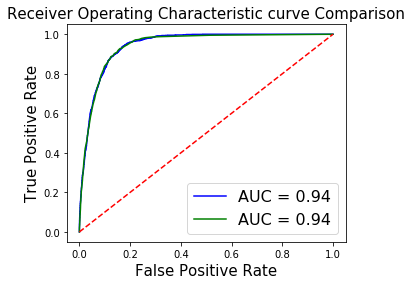

In [48]:
from sklearn import metrics
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4))
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

probsx = rfc.predict_proba(X_test)
predsx = probsx[:,1]
fprrf, tprrf, thresholdrf = metrics.roc_curve(y_test, predsx)
roc_aucrf = metrics.auc(fprrf, tprrf)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk,color ='blue')
ax1.plot(fprrf, tprrf, 'b', label = 'AUC = %0.2f' % roc_aucrf, color = 'green')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic curve Comparison',fontsize=15)
ax1.set_ylabel('True Positive Rate',fontsize=15)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'top right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [43]:
#one important metrics 
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,gbkpred) #moderate 

0.5293921315485888

# CONCLUSION

- From this we can conlcude that comparing accuracy to choose a model is not a good approach for imbalanced data.
- So used confusion matrix in that several metrics is usefull here after choosing less type1 error then final model is choosed by f1score.

# THANK YOU